In [9]:
import numpy as np
import matplotlib.image as img
import matplotlib.pyplot as plot
import tensorflow as tf

sess = tf.Session()

In [3]:
node1 = tf.constant(3.0, dtype=tf.float32)
node2 = tf.constant(4.0)

In [4]:
print node1, node2

Tensor("Const_1:0", shape=(), dtype=float32) Tensor("Const_2:0", shape=(), dtype=float32)


In [6]:
print sess.run([node1, node2])

[3.0, 4.0]


In [7]:
node3 = tf.add(node1, node2)

In [12]:
print node3
print sess.run(node3)

Tensor("Add:0", shape=(), dtype=float32)
7.0


In [11]:
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)
adder_node = a + b

sess = tf.Session()
print sess.run(adder_node, {a:3, b:4.5})
print sess.run(adder_node, {a:[1,3], b:[2,4]})

add_and_triple = adder_node * 3
print sess.run(add_and_triple, {a:3, b:4.5})

7.5
[3. 7.]
22.5


In [13]:
w = tf.Variable([.3], dtype=tf.float32)
b = tf.Variable([-.3], dtype=tf.float32)
x = tf.placeholder(tf.float32)
linear_model = w*x + b

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

print sess.run(linear_model, {x: [1, 2, 3, 4]})

[0.         0.3        0.6        0.90000004]


In [14]:
y = tf.placeholder(tf.float32)
squared_delats = tf.square(linear_model -y)
loss = tf.reduce_mean(squared_delats)

print sess.run(loss, {x: [1, 2, 3, 4], y: [0, -1, -2, -3]})

5.915


In [3]:
arr = np.array([1, 5.5, 3, 15, 20])
print arr
print arr.ndim
print arr.shape
print arr.dtype

[ 1.   5.5  3.  15.  20. ]
1
(5,)
float64


In [4]:
tensor = tf.convert_to_tensor(arr, tf.float64)
print tensor

Tensor("Const:0", shape=(5,), dtype=float64)


In [5]:
sess = tf.Session()

print sess.run(tensor)
print sess.run(tensor[1])

[ 1.   5.5  3.  15.  20. ]
5.5


In [8]:
arr1 = np.array([(1, 2, 3), (4, 5, 6)])
arr2 = np.array([(7, 8, 9), (10, 11, 12)])
arr3 = tf.add(arr1, arr2)
tensor = sess.run(arr3)
print tensor

[[ 8 10 12]
 [14 16 18]]


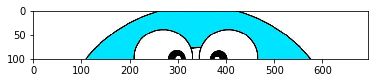

In [13]:
myfile = "img/0001.jpg"
myimage = img.imread(myfile)
slices = tf.placeholder("int32", [None, None, 3])
cropped = tf.slice(myimage, [10,0,0], [100,-1,-1])

result = sess.run(cropped, feed_dict={slices : myimage})
plot.imshow(result)
plot.show()